<a href="https://colab.research.google.com/github/Elwing-Chou/ximen0317/blob/main/ximen_0407.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
好用第三方函式庫:
1. pandas: 表格函式庫
2. matplotlib: 所有繪圖函式庫的基礎
3. seaborn: 基於matplotlib延伸的函式庫

```



In [ ]:
# !開始代表他不是python語法, 而是command line命令
!pip install pandas

In [12]:
import json
import urllib.request as req
import pandas as pd


url = "https://api.gamer.com.tw/anime/v1/danmu.php?videoSn=34643&geo=TW%2CHK"
f = req.urlopen(url)
content = f.read()
content_convert = json.loads(content)
data = content_convert["data"]
danmu_list = data["danmu"]

# danmu_list(list) 轉換成 pandas自訂的表格型態 DataFrame
table = pd.json_normalize(danmu_list)
# DataFrame專屬功能
# 如果要tsv, 多加個參數 sep="\t"
# 存的時候會預設幫你多存一行(列標籤) 0 1 2...
# 如果你不要 index=False
table.to_csv("danmu.csv", encoding="utf-8")
# table.to_excel("danmu.xlsx")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, '(-9.53, 3536.5]'),
  Text(1, 0, '(3536.5, 7013.0]'),
  Text(2, 0, '(7013.0, 10489.5]'),
  Text(3, 0, '(10489.5, 13966.0]'),
  Text(4, 0, '(13966.0, 17442.5]'),
  Text(5, 0, '(17442.5, 20919.0]'),
  Text(6, 0, '(20919.0, 24395.5]'),
  Text(7, 0, '(24395.5, 27872.0]'),
  Text(8, 0, '(27872.0, 31348.5]'),
  Text(9, 0, '(31348.5, 34825.0]'),
  Text(10, 0, '(34825.0, 38301.5]'),
  Text(11, 0, '(38301.5, 41778.0]'),
  Text(12, 0, '(41778.0, 45254.5]'),
  Text(13, 0, '(45254.5, 48731.0]'),
  Text(14, 0, '(48731.0, 52207.5]'),
  Text(15, 0, '(52207.5, 55684.0]'),
  Text(16, 0, '(55684.0, 59160.5]'),
  Text(17, 0, '(59160.5, 62637.0]'),
  Text(18, 0, '(62637.0, 66113.5]'),
  Text(19, 0, '(66113.5, 69590.0]')])

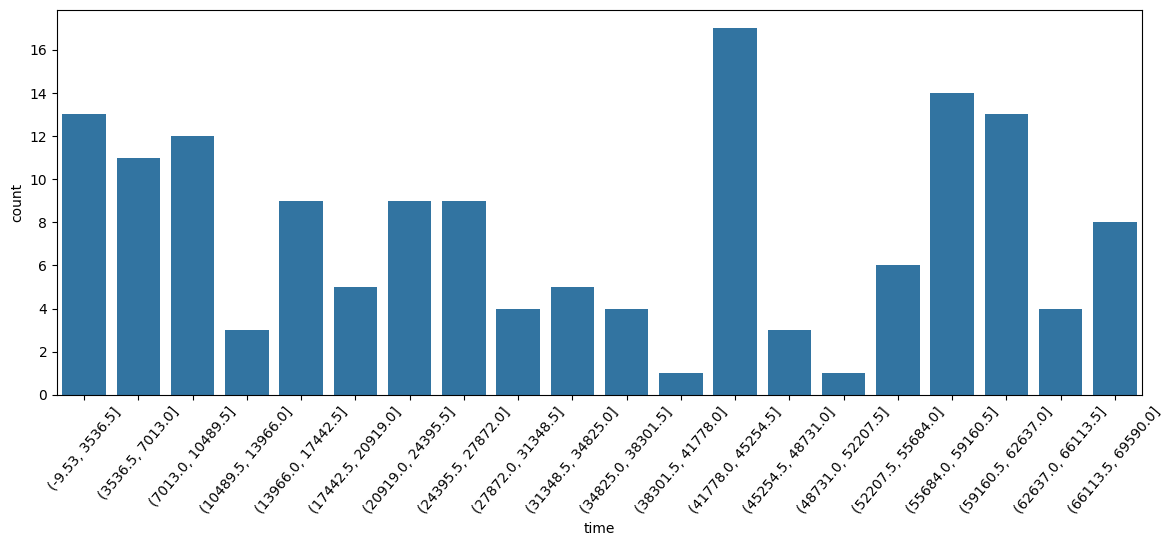

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

table = pd.read_csv("danmu.csv", encoding="utf-8")
# 取行: 基本上跟字典依樣 [key] -> [欄位名稱]
# 取單行
danmu_time = table["time"]
# 取多行(帶給他多個欄位名稱[名稱1, 名稱2])
# table[["userid", "text"]]
danmu_time_cut = pd.cut(danmu_time, bins=20)
# 如果你畫橫的, 刻度(ticks)會重疊
# figure: 設定圖的參數(figsize=圖的大小)
plt.figure(figsize=[14, 5])
sns.countplot(x=danmu_time_cut)
plt.xticks(rotation=50)